In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from matplotlib.ticker import PercentFormatter
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00


In [4]:
df.isnull().sum()


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
df.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00


In [6]:
df.category.value_counts()

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

In [7]:
df.main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [8]:
print(len(df.category.unique()))
print(len(df.main_category.unique())) 

159
15


In [9]:
df.shape[0]==len(df.ID.unique())

True

In [10]:
df.launched = pd.to_datetime(df.launched)

In [11]:
df.country.value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [12]:
df.country = df.country.replace(to_replace='N,0"', value='NO')

In [13]:
df['success'] = (df.usd_goal_real <= df.usd_pledged_real)*1

In [14]:
df.success.describe()

count    378661.000000
mean          0.361912
std           0.480554
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: success, dtype: float64

In [15]:
df_encoded = pd.get_dummies(df.drop(labels=['name', 'launched', 'deadline', 'state',
                                            'category', 'currency', 'usd pledged', 'pledged',
                                            'ID', 'goal'], axis=1), 
                            columns=['main_category', 'country'])

In [16]:
df_encoded['average_backing'] = (df_encoded['usd_pledged_real']/(df_encoded['backers']+1))

In [17]:
def percent_plot(data, title):
   
    ax = data.plot(kind='bar')
    plt.title(title)
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.show();

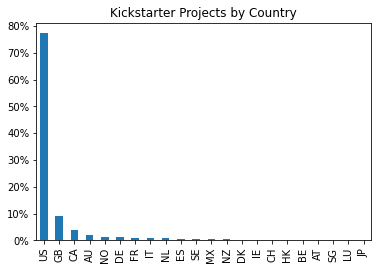

In [18]:
percent_plot((df.country.value_counts()/df.shape[0]*100), "Kickstarter Projects by Country")

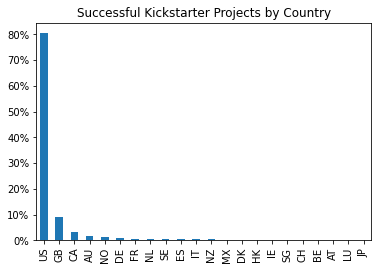

In [19]:
percent_plot((df[df.usd_pledged_real>=df.usd_goal_real].country.value_counts()/
              df[df.usd_pledged_real>=df.usd_goal_real].shape[0]*100), 
             "Successful Kickstarter Projects by Country")

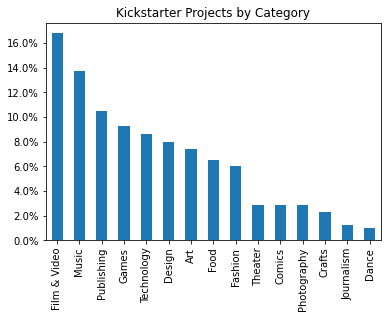

In [20]:
percent_plot((df.main_category.value_counts()/df.shape[0]*100), 
             "Kickstarter Projects by Category")

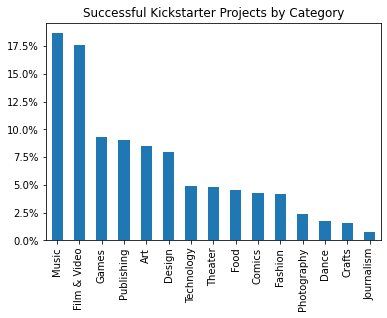

In [21]:
percent_plot((df[df.usd_pledged_real>=df.usd_goal_real].main_category.value_counts()/
              df[df.usd_pledged_real>=df.usd_goal_real].shape[0]*100), 
             "Successful Kickstarter Projects by Category")

In [22]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


In [23]:
df["launched"] = pd.to_datetime(df["launched"]).dt.strftime("%Y%m%d")

In [24]:
df['launched'] = pd.to_numeric(df['launched'].str.replace('-',''))

In [25]:
df["deadline"] = pd.to_datetime(df["deadline"]).dt.strftime("%Y%m%d")

In [26]:
df['deadline'] = pd.to_numeric(df.deadline.str.replace('-',''))

In [27]:
df


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,20151009,1000.0,20150811,0.0,failed,0,GB,0.0,0.0,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,20171101,30000.0,20170902,2421.0,failed,15,US,100.0,2421.0,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,20130226,45000.0,20130112,220.0,failed,3,US,220.0,220.0,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,20120416,5000.0,20120317,1.0,failed,1,US,1.0,1.0,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,20150829,19500.0,20150704,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,20141017,50000.0,20140917,25.0,canceled,1,US,25.0,25.0,50000.00,0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,20110719,1500.0,20110622,155.0,failed,5,US,155.0,155.0,1500.00,0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,20100816,15000.0,20100701,20.0,failed,1,US,20.0,20.0,15000.00,0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,20160213,15000.0,20160113,200.0,failed,6,US,200.0,200.0,15000.00,0


In [28]:
df['duration'] = (df.deadline - df.launched)

In [29]:
df


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,20151009,1000.0,20150811,0.0,failed,0,GB,0.0,0.0,1533.95,0,198
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,20171101,30000.0,20170902,2421.0,failed,15,US,100.0,2421.0,30000.00,0,199
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,20130226,45000.0,20130112,220.0,failed,3,US,220.0,220.0,45000.00,0,114
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,20120416,5000.0,20120317,1.0,failed,1,US,1.0,1.0,5000.00,0,99
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,20150829,19500.0,20150704,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,20141017,50000.0,20140917,25.0,canceled,1,US,25.0,25.0,50000.00,0,100
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,20110719,1500.0,20110622,155.0,failed,5,US,155.0,155.0,1500.00,0,97
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,20100816,15000.0,20100701,20.0,failed,1,US,20.0,20.0,15000.00,0,115
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,20160213,15000.0,20160113,200.0,failed,6,US,200.0,200.0,15000.00,0,100


In [30]:
df_encoded[df_encoded.success==1].usd_goal_real.describe()

count    1.370420e+05
mean     9.477405e+03
std      2.773888e+04
min      1.000000e-02
25%      1.323050e+03
50%      3.807055e+03
75%      1.000000e+04
max      2.015609e+06
Name: usd_goal_real, dtype: float64

In [31]:
df_encoded[df_encoded.success==0].usd_goal_real.describe()

count    2.416190e+05
mean     6.585991e+04
std      1.442797e+06
min      1.000000e-02
25%      2.690480e+03
50%      7.559720e+03
75%      2.200000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

In [32]:
df_encoded[df_encoded.success==1].average_backing.describe()

count    1.370420e+05
mean     1.667539e+02
std      7.484850e+03
min      3.950000e-01
25%      4.036037e+01
50%      6.254378e+01
75%      1.026918e+02
max      2.762572e+06
Name: average_backing, dtype: float64

In [33]:
df_encoded[df_encoded.success==0].average_backing.describe()

count    241619.000000
mean         43.500706
std         125.853411
min           0.000000
25%           0.535833
50%          19.575000
75%          49.021940
max       17425.000000
Name: average_backing, dtype: float64

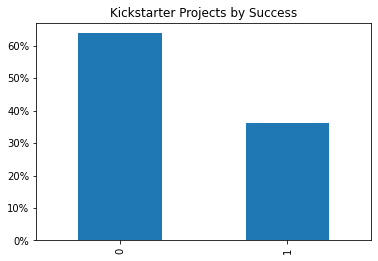

In [34]:
percent_plot((df_encoded.success.value_counts()/df.shape[0]*100),
             "Kickstarter Projects by Success")

In [35]:
def corr_plot(features, fig_size):
    
    corr=df_encoded[features].corr()
    fig, ax = plt.subplots(figsize=fig_size)
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            ax=ax, linewidths=0.01)

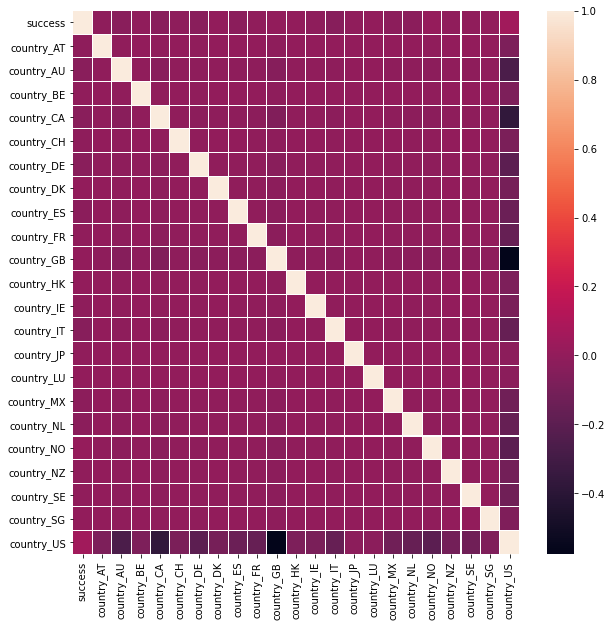

In [36]:
corr_plot(['success', 'country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US'], (10,10))

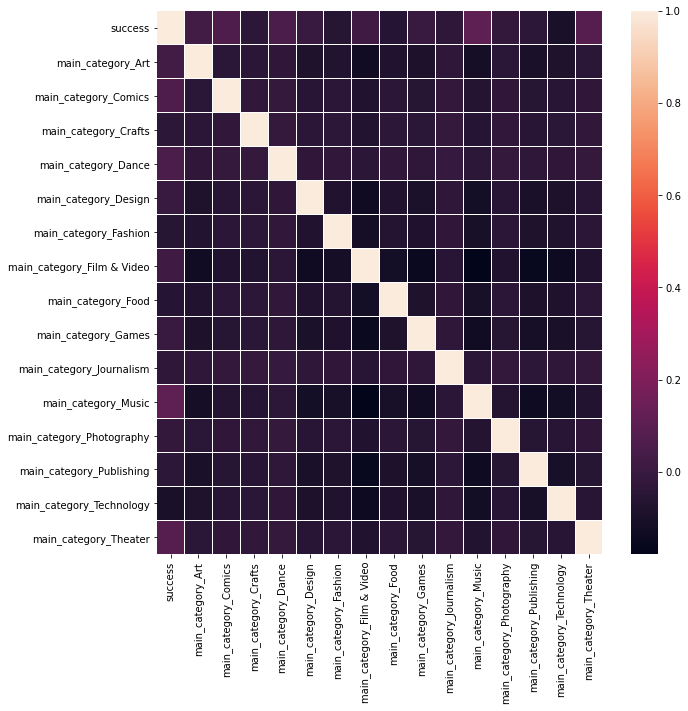

In [37]:
corr_plot(['success','main_category_Art', 'main_category_Comics',
       'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater'], (10,10))

In [38]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(['success'], axis='columns').values,
                                                    df_encoded.success, 
                                                    test_size=0.2)

In [40]:
df_encoded

,backers,usd_pledged_real,usd_goal_real,success,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,...,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,average_backing
0,0,0.0,1533.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,15,2421.0,30000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,151.312500
2,3,220.0,45000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,55.000000
3,1,1.0,5000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.500000
4,14,1283.0,19500.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,85.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,1,25.0,50000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12.500000
378657,5,155.0,1500.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,25.833333
378658,1,20.0,15000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10.000000
378659,6,200.0,15000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,28.571429


In [41]:
score_rfc=[]
score_bayes=[]
score_lrc=[]
score_dec=[]
score_knn=[]

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

In [43]:
accuracy=dtc.score(X_test,y_test)
print(accuracy)

0.9991285172910092


In [44]:
from sklearn.metrics import classification_report
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     48076\n           1       1.00      1.00      1.00     27657\n\n    accuracy                           1.00     75733\n   macro avg       1.00      1.00      1.00     75733\nweighted avg       1.00      1.00      1.00     75733\n'

In [45]:
score_dec.append(accuracy)

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

In [47]:
accuracy=gnb.score(X_test,y_test)
print(accuracy)

0.7031941161712859


In [48]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.99      0.68      0.81     69404\n           1       0.21      0.91      0.34      6329\n\n    accuracy                           0.70     75733\n   macro avg       0.60      0.80      0.57     75733\nweighted avg       0.92      0.70      0.77     75733\n'

In [49]:
score_bayes.append(accuracy)

In [50]:
from sklearn.neighbors import KNeighborsClassifier  
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [51]:
accuracy=knn.score(X_test,y_test)
print(accuracy)

0.9994586243777481


In [52]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     48051\n           1       1.00      1.00      1.00     27682\n\n    accuracy                           1.00     75733\n   macro avg       1.00      1.00      1.00     75733\nweighted avg       1.00      1.00      1.00     75733\n'

In [53]:
score_knn.append(accuracy)

In [54]:
from sklearn.svm import SVC  
svclinear=SVC(kernel='linear')
svclinear.fit(X_train,y_train)
y_pred=svclinear.predict(X_test)

In [55]:
accuracy=svclinear.score(X_test,y_test)
print(accuracy)

0.9999471828661217


In [56]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     48084\n           1       1.00      1.00      1.00     27649\n\n    accuracy                           1.00     75733\n   macro avg       1.00      1.00      1.00     75733\nweighted avg       1.00      1.00      1.00     75733\n'

In [57]:
import pickle

In [58]:
pickle.dump(knn,open('knnmodel.pickle','wb'))

In [59]:
pickle.dump(svclinear,open('svmlinear.pickle','wb'))

In [60]:
pickle.dump(dtc,open('deccsionmodel.pickle','wb'))

In [61]:
pickle.dump(gnb,open('naviebayesmodel.pickle','wb'))

In [62]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

D:\Development\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
accuracy=lr.score(X_test,y_test)
print(accuracy)

0.9999471828661217


In [64]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     48084\n           1       1.00      1.00      1.00     27649\n\n    accuracy                           1.00     75733\n   macro avg       1.00      1.00      1.00     75733\nweighted avg       1.00      1.00      1.00     75733\n'

In [65]:
pickle.dump(lr,open('LogisticModel.pickle','wb'))

In [66]:
rfc=RandomForestClassifier(random_state=10)

In [67]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [68]:
y_pred=rfc.predict(X_test)

In [69]:
accuracy=rfc.score(X_test,y_test)
print(accuracy)

0.9969234019515931


In [70]:
pickle.dump(rfc,open('RandomForestModel.pickle','wb'))

In [71]:
df_encoded

,backers,usd_pledged_real,usd_goal_real,success,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,...,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,average_backing
0,0,0.0,1533.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,15,2421.0,30000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,151.312500
2,3,220.0,45000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,55.000000
3,1,1.0,5000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.500000
4,14,1283.0,19500.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,85.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,1,25.0,50000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12.500000
378657,5,155.0,1500.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,25.833333
378658,1,20.0,15000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10.000000
378659,6,200.0,15000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,28.571429


In [72]:
df_encoded.columns


Index(['backers', 'usd_pledged_real', 'usd_goal_real', 'success',
       'main_category_Art', 'main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US',
       'average_backing'],
      dtype='object')

In [73]:

classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     47883\n           1       1.00      0.99      1.00     27850\n\n    accuracy                           1.00     75733\n   macro avg       1.00      1.00      1.00     75733\nweighted avg       1.00      1.00      1.00     75733\n'